
# <center><font style="color:rgb(100,109,254)">Cat, Car  & Pedestrian Detection With Optimization</font><center>


In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

Beside these you can get more intresting models from here
https://github.com/Itseez/opencv/tree/master/data/haarcascades

##  <font style="color:rgb(134,19,348)"> Cat Face Detection  </font> 
By just plugging in a model trained on cat faces, we can do cat face detection with haar cascades

In [29]:
cat_cascade = cv2.CascadeClassifier('media/M4/haarcascade_frontalcatface.xml')
cap = cv2.VideoCapture('media/M4/catrec.wmv')
cv2.namedWindow('img', cv2.WINDOW_NORMAL)

while 1:
    
        ret, image = cap.read()
        if not ret:
             break
                
        # just resizing to 70% of the size to increase speed       
        image = cv2.resize(image, (0,0), fx=0.7, fy=0.7) 
        cat_faces = cat_cascade.detectMultiScale(image)
        
        for (x,y,w,h) in cat_faces:            
                cv2.rectangle(image,(x ,y),(x+w,y+h),(0,0,255),2)
                cv2.putText(image,'Cat Detected',(x,y+h+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2, cv2.LINE_AA)   
                   
        cv2.imshow('img',image)
        k = cv2.waitKey(25) 
        if k == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

## <font style="color:rgb(134,19,348)"> Pedestrian Detection </font> 
Similarly we have a model trained on Pedestrians

In [36]:
ped_cascade = cv2.CascadeClassifier('media/M4/haarcascade_fullbody.xml')
cap = cv2.VideoCapture('media/M4/vtest.avi')
cv2.namedWindow('img', cv2.WINDOW_NORMAL)

while 1:
    
        ret, image = cap.read()
        if not ret:
             break

        image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
        pedestrians = ped_cascade.detectMultiScale(image)
        
        for (x,y,w,h) in pedestrians :
                cv2.rectangle(image,(x ,y),(x+w,y+h),(0,0,255),2)
                   
        cv2.imshow('img',image)
        k = cv2.waitKey(1) 
        if k == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

##  <font style="color:rgb(134,19,348)"> Improved Version  </font> 
Now in this version we compute the coordinates on a lower res image for speed benefits and then after having the coordinates we draw on the original image by rescaling the coordinates according to the original image.

This is really neat trick to get speed when dealing with models whose speed rely on image size.

So here's what we do Suppose we have a 100 x 100 image , and we resize it to 50x50 so our model can run faster.

Now the ratio of the resizing is `100 / 50  = 2`
Now suppose we perform the computation on the image and detect a person's top left corner at location `(10,10)` of the downsized image, now if we want to draw these coordinates on the original image then we also have to resale these coordinates by multiplying it by the ratio, so we would do `10x10 * 2` to draw the correct coordinates on the original image and then show the original image as result.

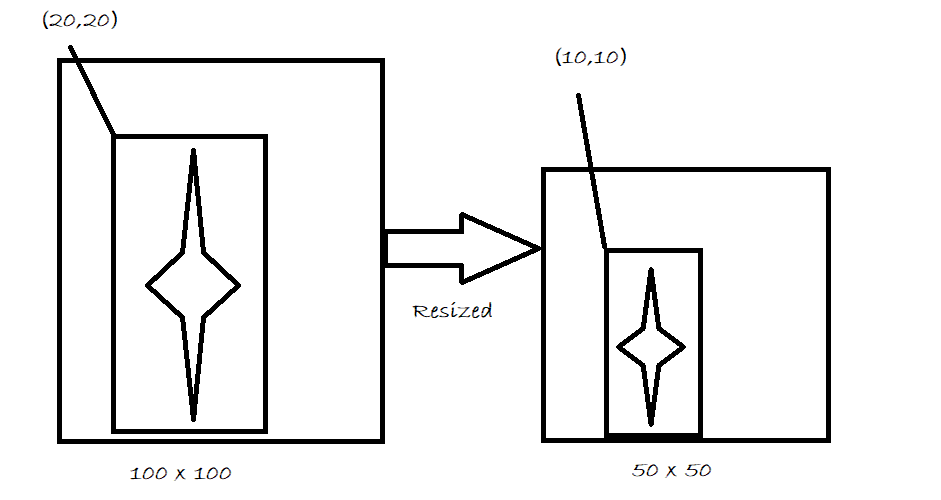

And Of course, my above artistic drawing is not to scale.

In [40]:
cap = cv2.VideoCapture('media/M4/vtest.avi')
ped_cascade = cv2.CascadeClassifier('media/M4/haarcascade_fullbody.xml')
cv2.namedWindow('img', cv2.WINDOW_NORMAL)

while 1:
    
        ret, image = cap.read()
        if not ret:
             break
                
        resized_image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
        ratio = 1 / 0.5

        faces = ped_cascade.detectMultiScale(resized_image)
        for (x,y,w,h) in faces:
                x= int(x * ratio)
                y =int( y * ratio )
                w = int(w * ratio)
                h =int( h * ratio)
            
                cv2.rectangle(image,(x ,y),(x+w,y+h),(0,0,255),2)
                   
        cv2.imshow('img',image)
        k = cv2.waitKey(1)
        if k == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

##  <font style="color:rgb(134,19,348)">  Car Detection with FPS  </font> 
Now its all good to monitor the speed visually but its much better and common practice to calculate FPS (Frames per second) when running models on video to check the speed.

Here's how you can do it easily

In [43]:
car_cascade = cv2.CascadeClassifier('media/M4/carshaar.xml')
cap = cv2.VideoCapture('media/M4/carsvid.wmv')
cv2.namedWindow('img', cv2.WINDOW_NORMAL)
fps = 0  # set initial fps variable to 0

while 1:  
    
        start_time = time.time() # note the current time at the start of the loop
        ret, image = cap.read()
        if not ret:
             break
        resized_image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
        
        cars = car_cascade.detectMultiScale(resized_image)  
            
        ratio = 1 / 0.5
        for (x,y,w,h) in cars:
                x = int(x * ratio)
                y =int( y * ratio)
                w = int(w * ratio)
                h =int( h * ratio)
            
                cv2.rectangle(image,(x ,y),(x+w,y+h),(0,0,255),2)
                cv2.putText(image,'Car Detected',(x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,0), 1, cv2.LINE_AA)
                cv2.putText(image, 'FPS: {:.2f}'.format(fps), (20, 50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),1,cv2.LINE_AA)
            
        cv2.imshow('img',image)
        
        # Minus the current time with start time to get total time for this loop
        total_time = time.time() - start_time 
        
        # divide the no of frames (1 in this case)/ by total time it took.
        # And now you have the Fps, which you display on each frame
        fps= (1.0 / total_time)   
    
        k = cv2.waitKey(1) 
        if k == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

##  <font style="color:rgb(134,19,348)"> Using Skip Frames   </font> 

Another Common technique to speed up the detection is to skip frames, meaning you perform detection on every alternative frame but show every frame, if the video was recored at high fps like 30 and the objects in it are not moving too fast then the detection coordinates computed for n-2 frame can be used for n-1 frame.

So this practically doubles the speed, unfortunately you can't see the difference in fps clearly as it will fluctuate too fast, but visually you can see the speed has doubled.

In [44]:
car_cascade = cv2.CascadeClassifier('media/M4/carshaar.xml')
cap = cv2.VideoCapture('media/M4/carsvid.wmv')
cv2.namedWindow('img', cv2.WINDOW_NORMAL)
skip_frame = True

while 1:    
        ret, image = cap.read()
        if not ret:
             break
        resized_image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
        
        if skip_frame:
            cars = car_cascade.detectMultiScale(resized_image)
            skip_frame = False
        else: 
            skip_frame = True
            
        ratio = 1 / 0.5
        for (x,y,w,h) in cars:
                x = int(x * ratio)
                y =int( y * ratio)
                w = int(w * ratio)
                h =int( h * ratio)
            
                cv2.rectangle(image,(x ,y),(x+w,y+h),(0,0,255),2)
                cv2.putText(image,'Car Detected',(x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,0), 1, cv2.LINE_AA)
                   
        cv2.imshow('img',image)
        k = cv2.waitKey(1) 
        if k == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()